## POS tagging using modified Viterbi

### Data Preparation

In [1]:
#Importing required libraries

#importing nltk library
import nltk

#importing regex module
import re

#importing numpy module
import numpy as np

#importing pandas module
import pandas as pd

#importing matplotlib for plotting graphs
import matplotlib.pyplot as plt

#importing seaborn module for better visulization
import seaborn as sns

#importing random module for generating random numbers
import random

#importing sckit learn module for prediction
from sklearn.model_selection import train_test_split

#importing nltk tokenize module for extracting tokens from the string of characters
from nltk.tokenize import word_tokenize


In [2]:
#Now we need to download universal tagset and this required for further processing
nltk.download('universal_tagset')

[nltk_data] Downloading package universal_tagset to
[nltk_data]     /Users/ssarava2/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [3]:
# reading the Treebank tagged sentences
nltk_data = list(nltk.corpus.treebank.tagged_sents(tagset='universal'))

In [4]:
#lets look at the data 
nltk_data[:4]

[[('Pierre', 'NOUN'),
  ('Vinken', 'NOUN'),
  (',', '.'),
  ('61', 'NUM'),
  ('years', 'NOUN'),
  ('old', 'ADJ'),
  (',', '.'),
  ('will', 'VERB'),
  ('join', 'VERB'),
  ('the', 'DET'),
  ('board', 'NOUN'),
  ('as', 'ADP'),
  ('a', 'DET'),
  ('nonexecutive', 'ADJ'),
  ('director', 'NOUN'),
  ('Nov.', 'NOUN'),
  ('29', 'NUM'),
  ('.', '.')],
 [('Mr.', 'NOUN'),
  ('Vinken', 'NOUN'),
  ('is', 'VERB'),
  ('chairman', 'NOUN'),
  ('of', 'ADP'),
  ('Elsevier', 'NOUN'),
  ('N.V.', 'NOUN'),
  (',', '.'),
  ('the', 'DET'),
  ('Dutch', 'NOUN'),
  ('publishing', 'VERB'),
  ('group', 'NOUN'),
  ('.', '.')],
 [('Rudolph', 'NOUN'),
  ('Agnew', 'NOUN'),
  (',', '.'),
  ('55', 'NUM'),
  ('years', 'NOUN'),
  ('old', 'ADJ'),
  ('and', 'CONJ'),
  ('former', 'ADJ'),
  ('chairman', 'NOUN'),
  ('of', 'ADP'),
  ('Consolidated', 'NOUN'),
  ('Gold', 'NOUN'),
  ('Fields', 'NOUN'),
  ('PLC', 'NOUN'),
  (',', '.'),
  ('was', 'VERB'),
  ('named', 'VERB'),
  ('*-1', 'X'),
  ('a', 'DET'),
  ('nonexecutive', 'ADJ'),
 

#### Now lets split the data into train and test set

In [5]:
#Now let's train 95% of data and test with 5% of data
random.seed(1234)
nltk_data_train, nltk_data_test = train_test_split(nltk_data, train_size=0.95, test_size=0.05)

In [6]:
#Now lets see the length of the train and test data
print("The length of the training dataset is {} \nThe length of the test dataset is {} ".format(len(nltk_data_train),len(nltk_data_test)))


The length of the training dataset is 3718 
The length of the test dataset is 196 


In [7]:
#Lets display few items from the train dataset
nltk_data_train[:4]

[[('Still', 'ADV'),
  (',', '.'),
  ('scientists', 'NOUN'),
  ('breathed', 'VERB'),
  ('a', 'DET'),
  ('collective', 'ADJ'),
  ('sigh', 'NOUN'),
  ('of', 'ADP'),
  ('relief', 'NOUN'),
  ('about', 'ADP'),
  ('the', 'DET'),
  ('finding', 'NOUN'),
  (',', '.'),
  ('because', 'ADP'),
  ('it', 'PRON'),
  ('demonstrates', 'VERB'),
  ('how', 'ADV'),
  ('*', 'X'),
  ('to', 'PRT'),
  ('overcome', 'VERB'),
  ('the', 'DET'),
  ('``', '.'),
  ('flux', 'NOUN'),
  ('pinning', 'NOUN'),
  ("''", '.'),
  ('problem', 'NOUN'),
  ('that', 'ADP'),
  ('*T*-1', 'X'),
  ('earlier', 'ADV'),
  ('this', 'DET'),
  ('year', 'NOUN'),
  ('was', 'VERB'),
  ('widely', 'ADV'),
  ('publicized', 'VERB'),
  ('as', 'ADP'),
  ('*', 'X'),
  ('undercutting', 'VERB'),
  ('new', 'ADJ'),
  ('superconductors', 'NOUN'),
  ("'", 'PRT'),
  ('potential', 'NOUN'),
  ('*T*-2', 'X'),
  ('.', '.')],
 [('At', 'ADP'),
  ('least', 'ADJ'),
  (',', '.'),
  ('that', 'DET'),
  ("'s", 'VERB'),
  ('the', 'DET'),
  ('way', 'NOUN'),
  ('0', 'X'),
 

In [8]:
#common function to compute the length of the train and test dataset
def tagged_words(data):
    ret_data = [tp for ds in data for tp in ds]
    return ret_data

nltk_train_tag_words = tagged_words(nltk_data_train)

print("Train Tagged Words - ", len(nltk_train_tag_words))

nltk_test_tag_words = tagged_words(nltk_data_test)

print("Test Tagged Words - ", len(nltk_test_tag_words))

Train Tagged Words -  95645
Test Tagged Words -  5031


In [9]:
nltk_train_tag_words[:10]

[('Still', 'ADV'),
 (',', '.'),
 ('scientists', 'NOUN'),
 ('breathed', 'VERB'),
 ('a', 'DET'),
 ('collective', 'ADJ'),
 ('sigh', 'NOUN'),
 ('of', 'ADP'),
 ('relief', 'NOUN'),
 ('about', 'ADP')]

In [10]:
#lets tokenize the words from train and test dataset

def tokenize_tagged_words(data):
    ret_data = [tag[0] for tag in nltk_train_tag_words]
    return ret_data

# #lets tokenize the words

nltk_tagged_tokenize_train = [tag[0] for tag in nltk_train_tag_words]

nltk_tagged_tokenize_test = [tag[0] for tag in nltk_test_tag_words]


In [11]:
nltk_tagged_tokenize_train[:8]

['Still', ',', 'scientists', 'breathed', 'a', 'collective', 'sigh', 'of']

In [12]:
#Now lets get the POS tags for train and test datas
nltk_train_tag_words_pos_token = [tag[1] for tag in nltk_train_tag_words]

nltk_test_tag_words_pos_token = [tag[1] for tag in nltk_test_tag_words]


In [13]:
#print the POS tags on train data
nltk_train_tag_words_pos_token[:12]

['ADV',
 '.',
 'NOUN',
 'VERB',
 'DET',
 'ADJ',
 'NOUN',
 'ADP',
 'NOUN',
 'ADP',
 'DET',
 'NOUN']

#### Build the vocabulary for train data

In [14]:
nltk_train_tag_vocal_set = set(nltk_tagged_tokenize_train)

In [15]:
#get the count of vocabulary set
nltk_train_tag_vocal_set_len = len(nltk_train_tag_vocal_set)
print(nltk_train_tag_vocal_set_len)

12071


#### Build the vocabulary for pos tags on train data

In [16]:
nltk_train_pos_set = set(nltk_train_tag_words_pos_token)

In [17]:
print(nltk_train_pos_set)

{'ADP', 'DET', 'CONJ', 'PRON', 'X', 'ADV', 'ADJ', 'NUM', 'VERB', 'PRT', 'NOUN', '.'}


In [18]:
nltk_train_pos_set_len = len(nltk_train_pos_set)
print(nltk_train_pos_set_len)

12


In [19]:
print("Vocabulary count is {} and Tag count is {}".format(nltk_train_tag_vocal_set_len,nltk_train_pos_set_len))

Vocabulary count is 12071 and Tag count is 12


### Emission and Transition probabilities

In [20]:
# Functions for computing emission and transition probabilites

#Emission probability calculation

def word_given_tag(word, tag, train_bag = nltk_train_tag_words):
    tag_list = [pair for pair in train_bag if pair[1]==tag]
    count_tag = len(tag_list)
    w_given_tag_list = [pair[0] for pair in tag_list if pair[0]==word]
    count_w_given_tag = len(w_given_tag_list)
    
    return (count_w_given_tag, count_tag)

#Transition probability calculation

def t2_given_t1(t2, t1, train_bag = nltk_train_tag_words):
    tags = [pair[1] for pair in train_bag]
    count_t1 = len([t for t in tags if t==t1])
    count_t2_t1 = 0
    for index in range(len(tags)-1):
        if tags[index]==t1 and tags[index+1] == t2:
            count_t2_t1 += 1
    return (count_t2_t1, count_t1)


In [21]:
#Build matrix by setting up the matrix size
nltk_tag_matrix = np.zeros((nltk_train_pos_set_len, nltk_train_pos_set_len), dtype='float32')

#Calculte the transition matrix
for i, t1 in enumerate(list(nltk_train_pos_set)):
    for j, t2 in enumerate(list(nltk_train_pos_set)): 
        nltk_tag_matrix[i, j] = t2_given_t1(t2, t1)[0]/t2_given_t1(t2, t1)[1]


In [22]:
# View the transition matrix
nltk_tag_matrix

array([[1.72836874e-02, 3.24335873e-01, 8.53515405e-04, 6.83879256e-02,
        3.42473052e-02, 1.39763150e-02, 1.06476046e-01, 6.27333820e-02,
        8.53515416e-03, 1.38696260e-03, 3.22095394e-01, 3.96884680e-02],
       [9.29278322e-03, 5.67221828e-03, 4.82741976e-04, 3.74125037e-03,
        4.53777462e-02, 1.26719773e-02, 2.06372201e-01, 2.25681867e-02,
        3.92227843e-02, 2.41370988e-04, 6.36857331e-01, 1.74993966e-02],
       [5.34386635e-02, 1.19888477e-01, 4.64684010e-04, 5.90148717e-02,
        8.82899668e-03, 5.43680303e-02, 1.13847584e-01, 3.90334576e-02,
        1.54739782e-01, 5.11152437e-03, 3.55018586e-01, 3.62453535e-02],
       [2.19568573e-02, 9.63020045e-03, 5.39291231e-03, 8.08936823e-03,
        9.32203382e-02, 3.23574729e-02, 7.39599392e-02, 7.31895212e-03,
        4.85362083e-01, 1.27118640e-02, 2.09938362e-01, 4.00616340e-02],
       [1.45956293e-01, 5.51922172e-02, 1.02089643e-02, 5.58302775e-02,
        7.36959651e-02, 2.58414429e-02, 1.69085972e-02, 2.87

In [23]:
# Lets convert the matrix to dataframe for convienence
nltk_tag_matrix_df = pd.DataFrame(nltk_tag_matrix, columns = list(nltk_train_pos_set), index=list(nltk_train_pos_set))


In [24]:
#Print the matrix after converting to pandas dataframe
nltk_tag_matrix_df

,ADP,DET,CONJ,PRON,X,ADV,ADJ,NUM,VERB,PRT,NOUN,.
ADP,0.017284,0.324336,0.000854,0.068388,0.034247,0.013976,0.106476,0.062733,0.008535,0.001387,0.322095,0.039688
DET,0.009293,0.005672,0.000483,0.003741,0.045378,0.012672,0.206372,0.022568,0.039223,0.000241,0.636857,0.017499
CONJ,0.053439,0.119888,0.000465,0.059015,0.008829,0.054368,0.113848,0.039033,0.154740,0.005112,0.355019,0.036245
PRON,0.021957,0.009630,0.005393,0.008089,0.093220,0.032357,0.073960,0.007319,0.485362,0.012712,0.209938,0.040062
X,0.145956,0.055192,0.010209,0.055830,0.073696,0.025841,0.016909,0.002871,0.203860,0.184080,0.062530,0.163024
ADV,0.118074,0.071240,0.007256,0.014512,0.024077,0.080805,0.129947,0.031003,0.339710,0.014182,0.031992,0.137203
ADJ,0.076948,0.004922,0.017063,0.000492,0.021001,0.004922,0.065792,0.021001,0.012305,0.010664,0.699426,0.065463
NUM,0.034698,0.002966,0.013642,0.001779,0.207592,0.002966,0.033215,0.183867,0.018090,0.026987,0.355279,0.118921
VERB,0.090980,0.133168,0.005283,0.035428,0.218631,0.082900,0.065574,0.022764,0.169295,0.032010,0.109471,0.034496
PRT,0.020970,0.101573,0.002294,0.017693,0.013434,0.009502,0.084535,0.057012,0.400393,0.001966,0.248034,0.042595


### EDA

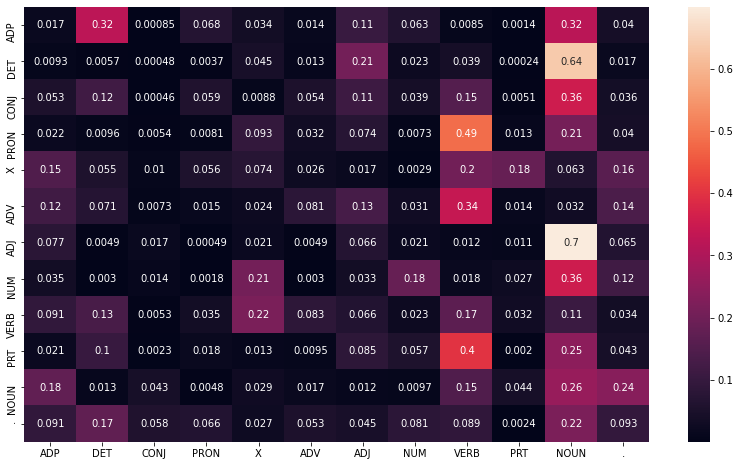

In [25]:
#Lets visualize the matrix visually using heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(nltk_tag_matrix_df, annot = True)
plt.show()

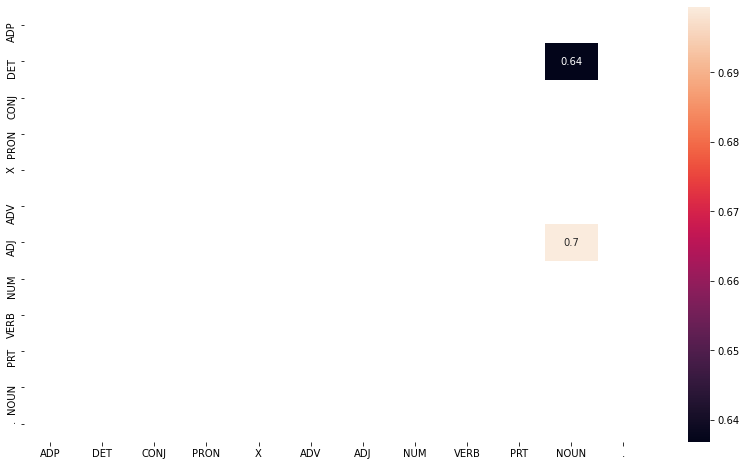

In [26]:
#Lets visualize the tags that frequently occured visually using heatmap
nltk_tag_matrix_df_freq = nltk_tag_matrix_df[nltk_tag_matrix_df>0.5]
plt.figure(figsize=(14, 8))
sns.heatmap(nltk_tag_matrix_df_freq, annot = True)
plt.show()

### Build the vanilla Viterbi based POS tagger

In [27]:
# Viterbi Heuristic
def Vanilla_Viterbi(words, train_bag = nltk_train_tag_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = nltk_tag_matrix_df.loc['.', tag]
            else:
                transition_p = nltk_tag_matrix_df.loc[state[-1], tag]
                
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p    
            p.append(state_probability)
            
        pmax = max(p)
        # getting state for which probability is maximum
        state_max = T[p.index(pmax)] 
        state.append(state_max)
    return list(zip(words, state))

In [28]:
random.seed(1234)

# get the list of tagged words
nltk_data_test_list = [tup for sent in nltk_data_test for tup in sent]

# get the list of untagged words
nltk_data_test_tag_word_list = [tup[0] for sent in nltk_data_test for tup in sent]

In [29]:
# Lets tag the test sentences using the Vanilla_Viterbi function 

nltk_tagged_seq = Vanilla_Viterbi(nltk_data_test_tag_word_list)

In [30]:
# Let's check and get the accuracy of the vanilla viterbi algorithm to a variable

nltk_check = [i for i, j in zip(nltk_tagged_seq, nltk_data_test_list) if i == j]

nltk_vanilla_viterbi_accuracy = len(nltk_check)/len(nltk_tagged_seq)

print("The accuracy of the Vanilla Viterbi Algorithm: ", nltk_vanilla_viterbi_accuracy)

The accuracy of the Vanilla Viterbi Algorithm:  0.9063804412641622


In [31]:
# Let's have a look at the incorrect tagged cases

nltk_wrong_tagged_cases = [[nltk_data_test_list[i-1],j] for i, j in enumerate(zip(nltk_tagged_seq, nltk_data_test_list)) if j[0]!=j[1]]



In [32]:
# Unknown words 

nltk_test_vocal_set = set([t for t in nltk_test_tag_words])

nltk_unknown_words = list(nltk_test_vocal_set - nltk_train_tag_vocal_set)

print("Total Unknown words : {} ".format(len(nltk_unknown_words)))

Total Unknown words : 1933 


### Solve the problem of unknown words

The vanilla Viterbi algorithm we had written had resulted in ~87% accuracy. The approx. 13% loss of accuracy was majorly due to the fact that when the algorithm encountered an unknown word.

Lets minimize the loss by modifying the vanilla viterbi
If the word is unknown then we can cionsider only transition_p otherwise consider both emission and transition probability

In [33]:
# Modified Viterbi Heuristic
def Vanilla_Viterbi_for_Unknown_Words(words, train_bag = nltk_train_tag_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = nltk_tag_matrix_df.loc['.', tag]
            else:
                transition_p = nltk_tag_matrix_df.loc[state[-1], tag]
                
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            
            # modification to the original vanilla viterbi algorithm 
            # to consider unknown words
            if word not in nltk_train_tag_vocal_set:
                state_probability = transition_p
            else:
                state_probability = emission_p * transition_p
                
            p.append(state_probability)
            
        pmax = max(p)
        # getting state for which probability is maximum
        state_max = T[p.index(pmax)] 
        state.append(state_max)
    return list(zip(words, state))

In [34]:
# tagging the test sentences
nltk_unknown_word_tag_sequence = Vanilla_Viterbi_for_Unknown_Words(nltk_data_test_tag_word_list)

# accuracy
nltk_unknown_word_chk = [i for i, j in zip(nltk_unknown_word_tag_sequence, nltk_data_test_list) if i == j]

nltk_optimized_viterbi_accuracy = len(nltk_unknown_word_chk)/len(nltk_unknown_word_tag_sequence)

print("The accuracy of the Vanilla Viterbi Algorithm after modification for unknown words: ", nltk_optimized_viterbi_accuracy)

The accuracy of the Vanilla Viterbi Algorithm after modification for unknown words:  0.9385807990459153


###  Lexicon and Rule Based Models for POS Tagging

#### Unigram tagger

In [35]:
nltk_ugram_tag = nltk.UnigramTagger(nltk_data_train)
nltk_ugram_tagger_acc = nltk_ugram_tag.evaluate(nltk_data_test)
print("Unigram Tagger accuracy: ", nltk_ugram_tagger_acc)

Unigram Tagger accuracy:  0.9043927648578811


In [36]:
# patterns for tagging using a rule based regex tagger -

patterns = [
    (r'^[aA-zZ].*[0-9]+','NOUN'),  # Alpha Numeric
    (r'.*ness$', 'NOUN'),
    (r'.*\'s$', 'NOUN'),              # possessive nouns
    (r'.*s$', 'NOUN'),                # plural nouns
    (r'.*', 'NOUN'),    
    (r'.*ly$', 'ADV'),
    (r'^(0|([*|-|$].*))','X'), # Any special character combination
    (r'.*ould$', 'X'), # modals
    (r'(The|the|A|a|An|an)$', 'DET'),
    (r'^([0-9]|[aA-zZ])+\-[aA-zZ]*$','ADJ'),
    (r'.*able$', 'ADJ'), # adjective like 100-megabytes 237-Seats
    (r'[aA-zZ]+(ed|ing|es)$', 'VERB'), # Any word ending with 'ing' or 'ed' is a verb
    (r'[0-9].?[,\/]?[0-9]*','NUM')# Numbers 
    ]

In [37]:
# Now lets do rule based regexptagger

nltk_rule_based_tagger = nltk.RegexpTagger(patterns)

# unigram tagger backed up by the rule-based tagger
nltk_rule_based_ugram_tagger = nltk.UnigramTagger(nltk_data_train, backoff = nltk_rule_based_tagger)

nltk_acc_rule_based_ugram_tagger = nltk_rule_based_ugram_tagger.evaluate(nltk_data_test)

print("The accuracy of Unigram Tagger by using RegexpTagger: ", nltk_acc_rule_based_ugram_tagger)

The accuracy of Unigram Tagger by using RegexpTagger:  0.9381832637646591


In [38]:
#Lets do the Bigram tagger

nltk_bigram_tagger = nltk.BigramTagger(nltk_data_train, backoff = nltk_rule_based_ugram_tagger)
nltk_bigram_tagger.evaluate(nltk_data_test)
nltk_acc_bigram_tagger = nltk_bigram_tagger.evaluate(nltk_data_test)
print("The accuracy of Bigram Tagger by using nltk_rule_based_ugram_tagger: ", nltk_acc_bigram_tagger)

The accuracy of Bigram Tagger by using nltk_rule_based_ugram_tagger:  0.9433512224209899


In [39]:
# Lets do the trigram tagger

nltk_trigram_tagger = nltk.TrigramTagger(nltk_data_train, backoff = nltk_bigram_tagger)
nltk_trigram_tagger.evaluate(nltk_data_test)
nltk_acc_trigram_tagger = nltk_trigram_tagger.evaluate(nltk_data_test)
print("The accuracy of the Trigram Tagger by using nltk_bigram_tagger: ", nltk_acc_trigram_tagger)

The accuracy of the Trigram Tagger by using nltk_bigram_tagger:  0.9423573842178493


### Method 2

If the viterbi algorithm is unable to tag an unknown word then it use the rule based tagger.

In [40]:
# A trigram tagger backed off by a rule based tagger.

def trigram_tagger(word, train_set = nltk_data_train):
    
    patterns = [
    (r'[aA-zZ]+(ed|ing|es)$', 'VERB'), # Any word ending with 'ing' or 'ed' is a verb

    (r'.*ly$', 'ADV'),
        
    (r'^([0-9]|[aA-zZ])+\-[aA-zZ]*$','ADJ'),
    (r'.*able$', 'ADJ'), 
    (r'.*ful$', 'ADJ'),
    (r'.*ous$', 'ADJ'),
        
    (r'^[aA-zZ].*[0-9]+','NOUN'),     # Alpha Numeric
    (r'.*ness$', 'NOUN'),
    (r'.*\'s$', 'NOUN'),              # possessive nouns - words ending with 's
    (r'.*s$', 'NOUN'),                # plural nouns
    (r'.*ers$', 'NOUN'),              # eg.- kinderganteners, autobioghapgers
    (r'.*ment$', 'NOUN'),
    (r'.*town$', 'NOUN'),
        
    (r'^(0|([*|-|$].*))','X'), # Any special character combination
    (r'.*ould$', 'X'),
        
    (r'(The|the|A|a|An|an|That|that|This|this|Those|those|These|these)$', 'DET'), # That/this/these/those belong to the category of Demonstrative determiners
    (r'[0-9].?[,\/]?[0-9]*','NUM'), # Numbers 
        
    (r'.*', 'NOUN')
    ]

    regex_based_tagger = nltk.RegexpTagger(patterns)

    # trigram backed up by the regex tagger
    nltk_trigram_regex_tagger = nltk.TrigramTagger(train_set, backoff = regex_based_tagger)
    return nltk_trigram_regex_tagger.tag_sents([[(word)]])

In [41]:
def viterbi_backedup_by_trigram_tagger(words, train_bag = nltk_train_tag_words):
    state = []
    tag_set = list(set([pair[1] for pair in train_bag]))
    
    # use the trigram tagger backed up by the rule based tagger
    # for unknown words.
    for key, word in enumerate(words):
        if word not in nltk_train_tag_vocal_set:
            unknown_word_tag = trigram_tagger(word)
            for sent in unknown_word_tag:
                for tup in sent:
                    state.append(tup[1])
        else:            
            p = [] 
            for tag in tag_set:
                if key == 0:
                    transition_p = nltk_tag_matrix_df.loc['.', tag]
                else:
                    transition_p = nltk_tag_matrix_df.loc[state[-1], tag]
                
            # compute emission and state probabilities
                emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
                state_probability = emission_p * transition_p    
                p.append(state_probability)
            
            pmax = max(p)
            # getting state for which probability is maximum
            state_max = tag_set[p.index(pmax)] 
            state.append(state_max)
    return list(zip(words, state))

#### Evaluating tagging accuracy

In [ ]:
# tagging the test sentences
nltk_viterbi_tgram_tagged_seq = viterbi_backedup_by_trigram_tagger(nltk_data_test_tag_word_list)

# accuracy
nltk_viterbi_tgram_word_check = [i for i, j in zip(nltk_viterbi_tgram_tagged_seq, nltk_data_test_list) if i == j]

nltk_viterbi_tgram_accuracy = len(nltk_viterbi_tgram_word_check)/len(nltk_viterbi_tgram_tagged_seq)

print("The accuracy of the viterbi_backedup_by_trigram_tagger : ", nltk_viterbi_tgram_accuracy)

### Compare the tagging accuracies of the modifications with the vanilla Viterbi algorithm

#### Step1: Lets check the accuracy of tagging on the test_set data generated using the nltk_data_test

In [ ]:
acccuracy_data = [['Vanilla Viterbi', nltk_vanilla_viterbi_accuracy*100], 
                  ['Optimized Vanilla Viterbi', nltk_optimized_viterbi_accuracy*100], 
                  ['Unigram Tagger', nltk_ugram_tagger_acc*100],
                  ['Unigram + RegexpTagger', nltk_acc_rule_based_ugram_tagger*100],
                  ['Bigram Tagger + Unigram_tagger', nltk_acc_bigram_tagger*100],
                  ['Trigram Tagger + Bigram_tagger', nltk_acc_trigram_tagger*100],
                  ['Viterbi + Trigram_tagger', nltk_viterbi_tgram_accuracy*100]]

#accuracy dataframe
nltk_acc_data_df = pd.DataFrame(acccuracy_data, columns = ['Tagging_Algorithm', 'Tagging_Accuracy'])

nltk_acc_data_df.set_index('Tagging_Algorithm', drop = True, inplace = True)

nltk_acc_data_df

In [ ]:
#plot the dataframe values
nltk_acc_data_df.plot.line(rot = 90, legend = False)

#### Step 2: Lets check the accuracy of tagging for the algorithm on the sample test sentences provided


In [ ]:
sample_test_sentences = ['Android is a mobile operating system developed by Google.',
"Android has been the best-selling OS worldwide on smartphones since 2011 and on tablets since 2013.",
"Google and Twitter made a deal in 2015 that gave Google access to Twitter's firehose.",
"Twitter is an online news and social networking service on which users post and interact with messages known as tweets.",
"Before entering politics, Donald Trump was a domineering businessman and a television personality.",
"The 2018 FIFA World Cup is the 21st FIFA World Cup, an international football tournament contested once every four years.",
"This is the first World Cup to be held in Eastern Europe and the 11th time that it has been held in Europe.",
"Show me the cheapest round trips from Dallas to Atlanta",
"I would like to see flights from Denver to Philadelphia.",
"Show me the price of the flights leaving Atlanta at about 3 in the afternoon and arriving in San Francisco.",
"NASA invited social media users to experience the launch of ICESAT-2 Satellite."]

In [ ]:
nltk_sample_test_tokens_sent = [word_tokenize(sent) for sent in sample_test_sentences]
nltk_sample_test_corpus_pos_tags = nltk.pos_tag_sents(nltk_sample_test_tokens_sent, tagset = 'universal')
nltk_sample_test_corpus_pos_tags

In [ ]:
# get the list of untagged words from the sample test data provided
nltk_sample_test_tag_words = [tup[0] for sent in nltk_sample_test_corpus_pos_tags for tup in sent]


# get the list of tagged words
nltk_sample_test_test_run_base = [tup for sent in nltk_sample_test_corpus_pos_tags for tup in sent]

In [ ]:
nltk_sample_test_tag_words


#### 1. Testing the accuracy of Vanilla Viterbi by using the sample test data

In [ ]:
# tagging the test sentences
nltk_sample_test_tag_seq = Vanilla_Viterbi(nltk_sample_test_tag_words)

#Now check the accuracy of the vanilla viterbi algorithm
nltk_sample_test_chk = [i for i, j in zip(nltk_sample_test_tag_seq, nltk_sample_test_test_run_base) if i == j]

nltk_vanilla_viterbi_acc_on_sample_test_data = len(nltk_sample_test_chk)/len(nltk_sample_test_tag_seq)

print("The accuracy of the Vanilla Viterbi Algorithm by using sample test data:", nltk_vanilla_viterbi_acc_on_sample_test_data)

#### 2. Testing the accuracy of Vanilla_Viterbi_for_Unknown_Words by using sample test data

In [ ]:
# Now tag the test sentences
nltk_sample_test_unknown_word_tag_seq = Vanilla_Viterbi_for_Unknown_Words(nltk_sample_test_tag_words)

# get the accuracy
nltk_sample_test_unknown_word_chk = [i for i, j in zip(nltk_sample_test_unknown_word_tag_seq, nltk_sample_test_test_run_base) if i == j]

nltk_sample_test_opt_viterbi_acc = len(nltk_sample_test_unknown_word_chk)/len(nltk_sample_test_unknown_word_tag_seq)

print("The accuracy of the Vanilla_Viterbi_for_Unknown_Words by using sample test data: ", nltk_sample_test_opt_viterbi_acc)

#### 3. Testing the accuracy of viterbi_backedup_by_trigram_tagger by using the sample test data

In [ ]:
# Now tag the test sentences
nltk_sample_test_viterbi_trigram_tag_seq = viterbi_backedup_by_trigram_tagger(nltk_sample_test_tag_words)

# get the accuracy
nltk_sample_test_viterbi_trigram_chk = [i for i, j in zip(nltk_sample_test_viterbi_trigram_tag_seq, nltk_sample_test_test_run_base) if i == j]

nltk_sample_test_viterbi_trigram_acc = len(nltk_sample_test_viterbi_trigram_chk)/len(nltk_sample_test_viterbi_trigram_tag_seq)

print("The accuracy of the viterbi_backedup_by_trigram_tagger by using sample test data: ", nltk_sample_test_viterbi_trigram_acc)

#### Comparing the accuracies of the 3 algorithm by using the sample test data

In [ ]:
nltk_acccuracy_on_sample_test_data = [['Vanilla Viterbi', nltk_vanilla_viterbi_acc_on_sample_test_data*100], 
                  ['Optimized Vanilla Viterbi', nltk_sample_test_opt_viterbi_acc*100], 
                  ['Viterbi + Trigram_tagger', nltk_sample_test_viterbi_trigram_acc*100]]

nltk_sample_test_data_acccuracy_df = pd.DataFrame(nltk_acccuracy_on_sample_test_data, columns = ['Tagging_Algorithm', 'Tagging_Accuracy'])

nltk_sample_test_data_acccuracy_df.set_index('Tagging_Algorithm', drop = True, inplace = True)

nltk_sample_test_data_acccuracy_df

In [ ]:
nltk_sample_test_data_acccuracy_df.plot.line(rot = 90, legend = False)


### List down cases which were incorrectly tagged by original POS tagger and got corrected by your modifications

In [ ]:
# test sentences

test_sentence_1 = 'Android is a mobile operating system developed by Google.'
test_sentence_2 = 'Android has been the best-selling OS worldwide on smartphones since 2011 and on tablets since 2013.'
test_sentence_3 = "Google and Twitter made a deal in 2015 that gave Google access to Twitter's firehose."
test_sentence_4 = 'Twitter is an online news and social networking service on which users post and interact with messages known as tweets.'
test_sentence_5 = 'Before entering politics, Donald Trump was a domineering businessman and a television personality.'
test_sentence_6 = 'The 2018 FIFA World Cup is the 21st FIFA World Cup, an international football tournament contested once every four years.'
test_sentence_7 = 'This is the first World Cup to be held in Eastern Europe and the 11th time that it has been held in Europe.'
test_sentence_8 = 'Show me the cheapest round trips from Dallas to Atlanta'
test_sentence_9 = 'I would like to see flights from Denver to Philadelphia.'
test_sentence_10 = 'Show me the price of the flights leaving Atlanta at about 3 in the afternoon and arriving in San Francisco.'
test_sentence_11 = 'NASA invited social media users to experience the launch of ICESAT-2 Satellite.'

### Case - 1

In [ ]:
# test_sentence_1 = 'Android is a mobile operating system developed by Google.'

nltk_words_test_sentence_1 = nltk.word_tokenize(test_sentence_1)

# pos tags with Vanilla_Viterbi
nltk_pos_tag_seq_with_vanilla_viterbi = Vanilla_Viterbi(nltk_words_test_sentence_1)
print("\n\n\nVanilla_Viterbi - Tagging - Sequence \n", nltk_pos_tag_seq_with_vanilla_viterbi)

# pos tags with viterbi_backedup_by_trigram_tagger
nltk_pos_tag_seq_with_viterbi_trigram = viterbi_backedup_by_trigram_tagger(nltk_words_test_sentence_1)
print("\n\n\n ===== \n\n\nTagging sequence with viterbi_backedup_by_trigram_tagger \n", nltk_pos_tag_seq_with_viterbi_trigram)

In [ ]:
cols = ['vanilla_viterbi_tags', 'viterbi_trigram_tags_with_corrections']
nltk_tags_corr_df_1 = pd.DataFrame(columns = cols)
nltk_tags_corr_df_1 = nltk_tags_corr_df_1.fillna(0)

nltk_tags_corr_df_1.vanilla_viterbi_tags = [tup for tup in nltk_pos_tag_seq_with_vanilla_viterbi]
nltk_tags_corr_df_1.viterbi_trigram_tags_with_corrections = [tup for tup in nltk_pos_tag_seq_with_viterbi_trigram]

nltk_tags_corr_df_1

### Case 2

In [ ]:
# test_sentence_6 = 'The 2018 FIFA World Cup is the 21st FIFA World Cup, 
#                   an international football tournament contested once every four years.'

nltk_words_test_sentence_6 = nltk.word_tokenize(test_sentence_6)

# pos tags with Vanilla_Viterbi
nltk_pos_tag_seq_with_vanilla_viterbi_6 = Vanilla_Viterbi(nltk_words_test_sentence_6)
print("\n\n\nVanilla_Viterbi - Tagging - Sequence \n", nltk_pos_tag_seq_with_vanilla_viterbi_6)

# pos tags with viterbi_backedup_by_trigram_tagger
nltk_pos_tag_seq_with_viterbi_trigram_6 = viterbi_backedup_by_trigram_tagger(nltk_words_test_sentence_6)
print("\n\n\n ===== \n\n\nTagging sequence with viterbi_backedup_by_trigram_tagger \n", nltk_pos_tag_seq_with_viterbi_trigram_6)

In [ ]:
nltk_tags_correction_df_6 = pd.DataFrame(columns = cols)
nltk_tags_correction_df_6 = nltk_tags_correction_df_6.fillna(0)

nltk_tags_correction_df_6.vanilla_viterbi_tags = [tup for tup in nltk_pos_tag_seq_with_vanilla_viterbi_6]
nltk_tags_correction_df_6.viterbi_trigram_tags_with_corrections = [tup for tup in nltk_pos_tag_seq_with_viterbi_trigram_6]

nltk_tags_correction_df_6

### Case 3

In [ ]:
# test_sentence_8 = 'Show me the cheapest round trips from Dallas to Atlanta'

nltk_words_test_sentence_8 = nltk.word_tokenize(test_sentence_8)

# pos tags with Vanilla_Viterbi
nltk_pos_tag_seq_with_vanilla_viterbi_8 = Vanilla_Viterbi(nltk_words_test_sentence_8)
print("\n\n\nVanilla_Viterbi - Tagging - Sequence \n", nltk_pos_tag_seq_with_vanilla_viterbi_8)

# pos tags with viterbi_backedup_by_trigram_tagger
nltk_pos_tag_seq_with_viterbi_trigram_8 = viterbi_backedup_by_trigram_tagger(nltk_words_test_sentence_8)
print("\n\n\n ===== \n\n\nTagging sequence with viterbi_backedup_by_trigram_tagger \n", nltk_pos_tag_seq_with_viterbi_trigram_8)

In [ ]:
tags_correction_df_8 = pd.DataFrame(columns = cols)
tags_correction_df_8 = tags_correction_df_8.fillna(0)

tags_correction_df_8.vanilla_viterbi_tags = [tup for tup in nltk_pos_tag_seq_with_vanilla_viterbi_8]
tags_correction_df_8.viterbi_trigram_tags_with_corrections = [tup for tup in nltk_pos_tag_seq_with_viterbi_trigram_8]

tags_correction_df_8

In [ ]:
# Default Vanilla Viterbi
# pos tags with Vanilla_Viterbi
nltk_sample_test_tag_seq_with_vanilla_viterbi = Vanilla_Viterbi(nltk_sample_test_tag_words)
print("\n\n\nVanilla_Viterbi - Tagging - Sequence \n", nltk_sample_test_tag_seq_with_vanilla_viterbi)

# From Method 1 - pos tags with Vanilla_Viterbi_for_Unknown_Words
nltk_sample_test_tag_seq_unknown_words = Vanilla_Viterbi_for_Unknown_Words(nltk_sample_test_tag_words)
print("\n\n\n====\n\n\nThe tagging sequence with viterbi using only transition probability for unknown words: ", 
      nltk_sample_test_tag_seq_unknown_words)

# From Method 2 - pos tags with viterbi_backedup_by_trigram_tagger
sample_test_tagged_sequence_with_viterbi_trigram = viterbi_backedup_by_trigram_tagger(nltk_sample_test_tag_words)
print("\n\n\n========\n\n\nTagging sequence with viterbi_backedup_by_trigram_tagger -\n\n", sample_test_tagged_sequence_with_viterbi_trigram)

In [ ]:
# A dataframe showing - 
# 1. the actual tags using nltk.pos_tag_sent
# 2. words as tagged by vanilla viterbi
# 3. words as tagged by Vanilla_Viterbi_for_Unknown_Words - METHOD - 1
# 4. words as tagged by viterbi_backedup_by_trigram_tagger - METHOD - 2

cols1 = ['actual_tags', 'as_tagged_by_vanilla_viterbi', 'as_tagged_by_Vanilla_Viterbi_for_Unknown_Words',
            'as_tagged_by_Vanilla_Viterbi_backed_by_trigram_tagger']

nltk_tags_comparison_df = pd.DataFrame(columns = cols1)
nltk_tags_comparison_df = nltk_tags_comparison_df.fillna(0)

# Actual tags
nltk_tags_comparison_df.actual_tags = [tup for tup in nltk_sample_test_test_run_base]

# tags by vanilla viterbi
nltk_tags_comparison_df.as_tagged_by_vanilla_viterbi = [tup for tup in nltk_sample_test_tag_seq_with_vanilla_viterbi]

# tags by Vanilla_Viterbi_for_Unknown_Words - METHOD - 1
nltk_tags_comparison_df.as_tagged_by_Vanilla_Viterbi_for_Unknown_Words = [tup for tup in nltk_sample_test_tag_seq_unknown_words]

# tags by viterbi_backedup_by_trigram_tagger - METHOD - 2
nltk_tags_comparison_df.as_tagged_by_Vanilla_Viterbi_backed_by_trigram_tagger = [tup for tup in 
                                                                            sample_test_tagged_sequence_with_viterbi_trigram]

nltk_tags_comparison_df[nltk_tags_comparison_df.as_tagged_by_vanilla_viterbi != 
                   nltk_tags_comparison_df.as_tagged_by_Vanilla_Viterbi_backed_by_trigram_tagger]

### Conclusion

From this we could see that most of the words are incorrectly tagged by vanilla viterbi algorithm and which corrected by the viterbi algorithm backed up by the trigram tagger.
